# **Tảo biển (1s, 50MB)**

Tảo biển sinh sản rất nhanh khi có môi trường thuận lợi với chúng và có những loài còn tiết ra môi trường những chất độc hại.

Một loại tảo nâu trong môi trường nước bị ô nhiễm nặng sinh sản theo quy luật sau:

Ngày đầu tiên (ngày 0) có n cá thể ở mức 1.
Ở mỗi ngày tiếp theo, mỗi cá thể mức i sinh ra i cá thể mức 1, các cá thể mới sinh sẽ sinh sôi, phát triển từ ngày hôm sau.
Bản thân các cá thể mức i phát triển thành mức i+1 và chu kỳ phát triển trong ngày chấm dứt.
Hãy xác định sau k ngày trong nước biển có bao nhiêu cá thể.

Dữ liệu: Vào từ thiết bị nhập chuẩn gồm một dòng chứa 2 số nguyên n và k $(1 ≤ n ≤ 1000, 1 ≤ k ≤ 10^{17} )$.

Kết quả: Đưa ra thiết bị xuất chuẩn một số nguyên – số lượng cá thể tảo theo mô đun $10^{9} + 7$.

Ví dụ:

Input : 3 2

Output: 15

# **1) ABSTRACTION**

Với n, k nhập vào từ bàn phímimage.png

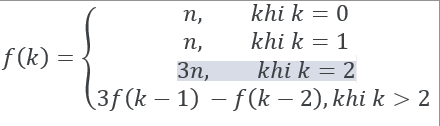

# **2) Pattern recognition**

Bài toán tính theo công thức dãy Fibonacci image.png

# **3) Algorithm designed**

In [ ]:
%%time
n,k = map(int,input().split())   #nhập n và k 
def fibo(n):                     #Tạo Function Fibonacci
    f0 = 0
    f1 = 1
    fn = 1
    if (n == 1):
        return n
    else:
        for i in range(2, n):     #Cộng 2 số trước đó và lưu nó
            f0 = f1
            f1 = fn
            fn = f0 + f1
        return fn
print((n * fibo(2*k + 1)) % (10**9 + 7))

3 2
15
CPU times: user 41.9 ms, sys: 9.12 ms, total: 51.1 ms
Wall time: 10.6 s


Nhưng chúng ta vẫn có thể có cách làm nhanh hơn sử dụng ma trận

Phương thức này phụ thuộc vào việc chúng ta nhân n lần ma trận  M = {{1,1},{1,0}} cho chính nó ( nói cách khác tính công suất (M,n)) sau đó chúng ta tìm số Fibonacci (n+1) như là thuộc tính của hàng và cột (0,0)

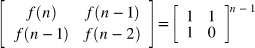

In [ ]:
MOD = 1000000007

def multiply(F,M):       #Nhân 2 ma trận F và M
  a = (F[0][0] * M[0][0] +  F[0][1] * M[1][0]) % MOD
  b = (F[0][0] * M[0][1] +  F[0][1] * M[1][1]) % MOD
  c = (F[1][0] * M[0][0] +  F[1][1] * M[1][0]) % MOD
  d = (F[1][0] * M[0][1] +  F[1][1] * M[1][1]) % MOD
  F[0][0] = a            #Gán giá trị mới vào ma trận F
  F[0][1] = b
  F[1][0] = c
  F[1][1] = d

Nhưng ở đây là chưa hết. Chúng ta có thể sử dụng recurrence formula để tìm số n trong Fibonacci in O(Log n) thời gian.

Nếu n là số chẵn thì k = n/2:

$(F(n) = [2*F(k-1) + F(k)]*F(k))$

Nếu n là số lẻ thì k = (n + 1)/2

$(F(n) = F(k)*F(k) + F(k-1)*F(k-1))$

# Chứng minh công thức
Xem phương thức của cả hai bên ta có:
**bold text**
$(-1)^{n} = F(n+1)*F(n-1) - F(n)^{2}$

**Bởi vì $(A^{n}A^{m} = A^{m+n})$ suy ra**


$F(m)F(n) + F(m-1)F(n-1) = F(m+n-1)$ **(1)**


**Cho n=n+1 vào phương trình:**


$F(m)F(n+1) + F(m-1)F(n) = Fm+n$  **(2)** 


**Cho m = n vào phương trình (1)**


F2n-1 = Fn2 + Fn-12


**cho m = n vào phương trình (2)**


$F(2n) = (F(n-1) + F(n+1))*F(n) = (2*F(n-1) + F(n))*F)$


**( Bằng cách cho (F(n+1) = F(n) + F(n-1)$ )**


**Để chứng minh công thức trên ta chỉ việc đơn giản chứng minh:**


Nếu n là *số chẵn*, ta cho *k = n/2* 


Nếu n là *số lẻ*, ta cho *k = (n+1)/2*

---



In [ ]:
def power(F,n):          #Tính F^n
  if n == 0 or n == 1:   #Nếu n=0 hoặc n=1 thì thoát ra
    return
  M = [[1,1],[1,0]]      #Khởi tạo ma trận đơn vị M
  power(F, n // 2)       #Nếu là số chẵn thì = F^(n/2) * F^(n/2)
  multiply(F,F)          
  if n % 2 != 0:         #Nếu là số lẽ thì = F^(n/2) * F^(n/2) * F
    multiply(F,M)

# Complexity evaluate

Time complexity:

*   Phương thức thứ nhất: image.png
*   Phương thức thứ 2: image.png




# Programming

In [ ]:
%%time
MOD = 1000000007

def multiply(F,M):
  a = (F[0][0] * M[0][0] +  F[0][1] * M[1][0]) % MOD
  b = (F[0][0] * M[0][1] +  F[0][1] * M[1][1]) % MOD
  c = (F[1][0] * M[0][0] +  F[1][1] * M[1][0]) % MOD
  d = (F[1][0] * M[0][1] +  F[1][1] * M[1][1]) % MOD
  F[0][0] = a
  F[0][1] = b
  F[1][0] = c
  F[1][1] = d
    
def power(F,n):
  if n == 0 or n == 1:
    return
  M = [[1,1],[1,0]]
  power(F, n // 2)  
  multiply(F,F)
  if n % 2 != 0:
    multiply(F,M)
    
def fibonacci(n):
  F = [[1,1],[1,0]]
  if n == 0:
    return 0
  power(F, n - 1)
  return F[0][0]

n, k = map(int,input().split())
print(n*fibonacci(2*k+1) % MOD)

3 2
15
CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 2.29 s
